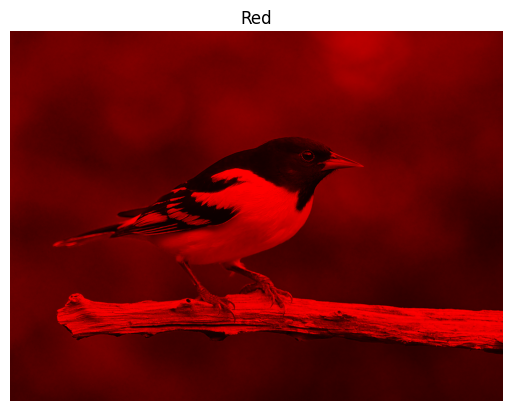

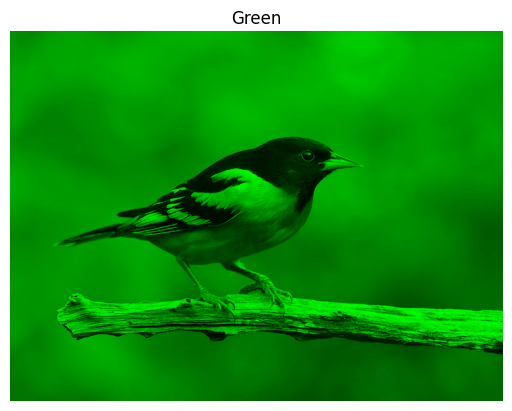

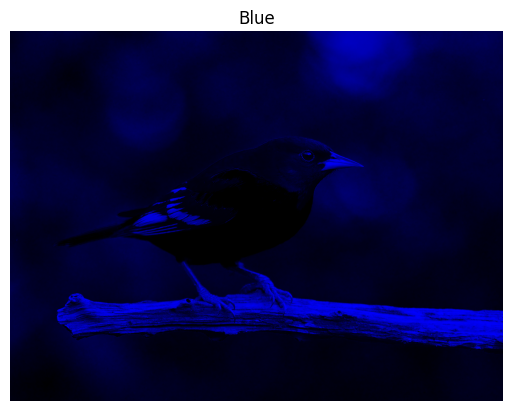

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import uniform_filter, gaussian_filter, median_filter, sobel
import colorsys

img = Image.open('bird.png')
arr = np.array(img)

red = arr.copy()
red[:, :, 1] = 0
red[:, :, 2] = 0

green = arr.copy()
green[:, :, 0] = 0
green[:, :, 2] = 0

blue = arr.copy()
blue[:, :, 0] = 0
blue[:, :, 1] = 0

imgs = {'Red': red, 'Green': green, 'Blue': blue}
for name, data in imgs.items():
    im = Image.fromarray(data)
    im.save(f'bird_{name.lower()}.png')
    
    plt.figure()
    plt.title(name)
    plt.axis('off')
    plt.imshow(data)
plt.show()



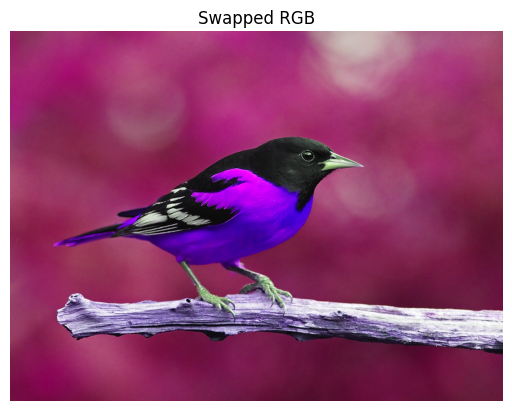

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import uniform_filter, gaussian_filter, median_filter, sobel
import colorsys

img = Image.open('bird.png')
arr = np.array(img)

swapped = arr.copy()
swapped[:, :, 0] = arr[:, :, 1]
swapped[:, :, 1] = arr[:, :, 2]
swapped[:, :, 2] = arr[:, :, 0]

im = Image.fromarray(swapped)
im.save('bird_swapped.png')

plt.figure()
plt.title('Swapped RGB')
plt.axis('off')
plt.imshow(swapped)
plt.show()



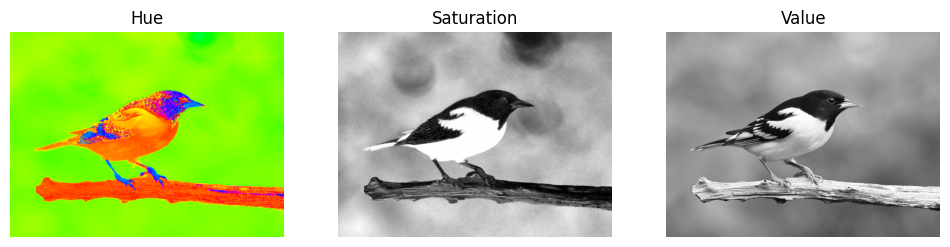

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import uniform_filter, gaussian_filter, median_filter, sobel
import colorsys

img = Image.open('bird.png')
arr = np.array(img) / 255.0

h_arr = np.zeros((arr.shape[0], arr.shape[1]))
s_arr = np.zeros_like(h_arr)
v_arr = np.zeros_like(h_arr)

for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        r, g, b = arr[i, j]
        h, s, v = colorsys.rgb_to_hsv(r, g, b)
        h_arr[i, j] = h
        s_arr[i, j] = s
        v_arr[i, j] = v

h_img = Image.fromarray((h_arr * 255).astype(np.uint8))
s_img = Image.fromarray((s_arr * 255).astype(np.uint8))
v_img = Image.fromarray((v_arr * 255).astype(np.uint8))

h_img.save('bird_H.png')
s_img.save('bird_S.png')
v_img.save('bird_V.png')

plt.figure(figsize=(12,4))
for i, (title, data) in enumerate(zip(['Hue', 'Saturation', 'Value'], [h_arr, s_arr, v_arr])):
    plt.subplot(1, 3, i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(data, cmap='hsv' if title=='Hue' else 'gray')
plt.show()



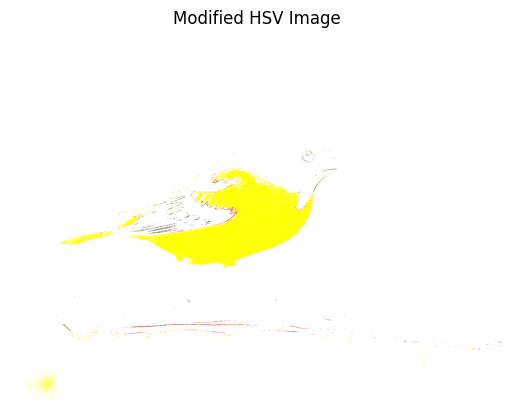

In [8]:
from PIL import Image
import numpy as np
import colorsys

img = Image.open('bird.png')
arr = np.array(img) / 255.0

h_arr = np.zeros((arr.shape[0], arr.shape[1]))
s_arr = np.zeros_like(h_arr)
v_arr = np.zeros_like(h_arr)

for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        r, g, b = arr[i, j]
        h, s, v = colorsys.rgb_to_hsv(r, g, b)
        h_arr[i, j] = h
        s_arr[i, j] = s
        v_arr[i, j] = v

h_new = h_arr / 3
v_new = v_arr * 34
s_new = s_arr

rgb_new = np.zeros_like(arr)
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        r, g, b = colorsys.hsv_to_rgb(h_new[i, j], s_new[i, j], v_new[i, j])
        rgb_new[i, j] = [r, g, b]

rgb_new = np.clip(rgb_new, 0, 1)

im = Image.fromarray((rgb_new * 255).astype(np.uint8))
im.save('bird_HSV_mod.png')

plt.figure()
plt.title('Modified HSV Image')
plt.axis('off')
plt.imshow(rgb_new)
plt.show()



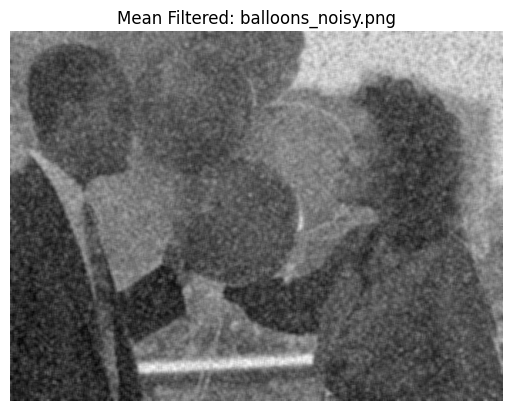

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import uniform_filter, gaussian_filter, median_filter, sobel
import colorsys

folder_path = 'Exercise'
output_folder = 'Exercise_filtered'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg')):
        filepath = os.path.join(folder_path, filename)
        img = Image.open(filepath).convert('L')
        arr = np.array(img)

        filtered = uniform_filter(arr, size=5)
        filtered = np.clip(filtered, 0, 255).astype(np.uint8)

        out_path = os.path.join(output_folder, f'filtered_{filename}')
        Image.fromarray(filtered).save(out_path)

        plt.figure()
        plt.title(f'Mean Filtered: {filename}')
        plt.axis('off')
        plt.imshow(filtered, cmap='gray')
plt.show()

